# Ordinary Brownian motion calculations

### Setup

#### Load external packages and my codes

In [1]:
include("Include.jl");

### Compare analytical solution, expectation and variance with samples

In [2]:
# Pick some parameters -
μ = 2.0;
σ = 20.0;

# Setup time, and initial values -
Δt = (1.0/252.0);
T = 42;
start_index = 0;
stop_index = start_index + T;
T₁ = start_index*Δt
T₂ = stop_index*Δt
Sₒ = 100.0;

In [3]:
# build model -
model = build(MyOrdinaryBrownianMotionEquityModel, (μ = μ, σ = σ));

In [4]:
# Compute the expectation and variance using the analytical solution -
expectation = 𝔼(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));
variance = Var(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));

## Visualize samples

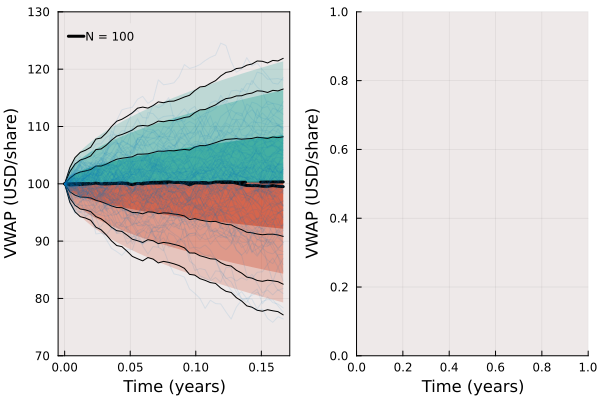

In [5]:
    
L68 = expectation[:,2] .- sqrt.(variance[:,2])
U68 = expectation[:,2] .+ sqrt.(variance[:,2])
L95 = expectation[:,2] .- 1.96*sqrt.(variance[:,2])
U95 = expectation[:,2] .+ 1.96*sqrt.(variance[:,2])
L99 = expectation[:,2] .- 2.576*sqrt.(variance[:,2])
U99 = expectation[:,2] .+ 2.576*sqrt.(variance[:,2]);

# Sample -
X = sample(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt), number_of_paths = 100);
TS = X[:,1];

expectation_XS = vec(mean(X[:,2:end], dims=2));
variance_XS = Var(X);

plot(expectation[:,1], expectation[:,2], fillrange=L68, c=colors[5], alpha=0.5, label="", layout=(1,2))
plot!(expectation[:,1], expectation[:,2], fillrange=U68, c=colors[6], alpha=0.5, label="")
plot!(expectation[:,1], expectation[:,2], fillrange=L95, c=colors[5], alpha=0.3, label="")
plot!(expectation[:,1], expectation[:,2], fillrange=U95, c=colors[6], alpha=0.3, label="")
plot!(expectation[:,1], expectation[:,2], fillrange=L99, c=colors[5], alpha=0.2, label="")
plot!(expectation[:,1], expectation[:,2], fillrange=U99, c=colors[6], alpha=0.2, label="")

plot!(TS, expectation_XS, c=:black, lw=3, label="")

L68 = expectation_XS .- sqrt.(variance_XS[:,2])
U68 = expectation_XS .+ sqrt.(variance_XS[:,2])
L95 = expectation_XS .- 1.96*sqrt.(variance_XS[:,2])
U95 = expectation_XS .+ 1.96*sqrt.(variance_XS[:,2])
L99 = expectation_XS .- 2.576*sqrt.(variance_XS[:,2])
U99 = expectation_XS .+ 2.576*sqrt.(variance_XS[:,2])

plot!(TS,L68,c=:black, label="")
plot!(TS,U68,c=:black, label="")
plot!(TS,L95,c=:black, label="")
plot!(TS,U95,c=:black, label="")
plot!(TS,L99,c=:black, label="")
plot!(TS,U99,c=:black, label="")

plot!(expectation[:,1], expectation[:,2],c=:black, lw=3,ls=:dash, label="N = 100", 
    bg=:snow2, background_color_outside="white", framestyle = :box, fg_legend = :transparent)
plot!(X[:,1],X[:,2:end], label="", c=colors[2], alpha=0.1, subplot=1, ylims=(70.0,130))
xlabel!("Time (years)", fontsize=18)
ylabel!("VWAP (USD/share)", fontsize=18)

In [6]:
L68 = expectation[:,2] .- sqrt.(variance[:,2])
U68 = expectation[:,2] .+ sqrt.(variance[:,2])
L95 = expectation[:,2] .- 1.96*sqrt.(variance[:,2])
U95 = expectation[:,2] .+ 1.96*sqrt.(variance[:,2])
L99 = expectation[:,2] .- 2.576*sqrt.(variance[:,2])
U99 = expectation[:,2] .+ 2.576*sqrt.(variance[:,2]);

# Sample -
X = sample(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt), number_of_paths = 1000);
TS = X[:,1];

expectation_XS = vec(mean(X[:,2:end], dims=2));
variance_XS = Var(X);

plot!(expectation[:,1], expectation[:,2], fillrange=L68, c=colors[5], alpha=0.5, label="", subplot=2)
plot!(expectation[:,1], expectation[:,2], fillrange=U68, c=colors[6], alpha=0.5, label="", subplot=2)
plot!(expectation[:,1], expectation[:,2], fillrange=L95, c=colors[5], alpha=0.3, label="", subplot=2)
plot!(expectation[:,1], expectation[:,2], fillrange=U95, c=colors[6], alpha=0.3, label="", subplot=2)
plot!(expectation[:,1], expectation[:,2], fillrange=L99, c=colors[5], alpha=0.2, label="", subplot=2)
plot!(expectation[:,1], expectation[:,2], fillrange=U99, c=colors[6], alpha=0.2, label="", subplot=2)

plot!(TS, expectation_XS, c=:black, lw=3, label="", subplot=2)

L68 = expectation_XS .- sqrt.(variance_XS[:,2])
U68 = expectation_XS .+ sqrt.(variance_XS[:,2])
L95 = expectation_XS .- 1.96*sqrt.(variance_XS[:,2])
U95 = expectation_XS .+ 1.96*sqrt.(variance_XS[:,2])
L99 = expectation_XS .- 2.576*sqrt.(variance_XS[:,2])
U99 = expectation_XS .+ 2.576*sqrt.(variance_XS[:,2])

plot!(TS,L68,c=:black, label="", subplot=2)
plot!(TS,U68,c=:black, label="", subplot=2)
plot!(TS,L95,c=:black, label="", subplot=2)
plot!(TS,U95,c=:black, label="", subplot=2)
plot!(TS,L99,c=:black, label="", subplot=2)
plot!(TS,U99,c=:black, label="", subplot=2)

plot!(expectation[:,1], expectation[:,2],c=:black, lw=3,ls=:dash, label="N = 1000", 
    bg=:snow2, background_color_outside="white", framestyle = :box, fg_legend = :transparent, subplot=2)
plot!(X[:,1],X[:,2:end], label="", c=colors[2], alpha=0.1, subplot=2, ylims=(70.0,130))
xlabel!("Time (years)", fontsize=18)
ylabel!("VWAP (USD/share)", fontsize=18)

# dump -
savefig("Test-OBM.svg")

"/Users/jeffreyvarner/Desktop/course_repos/CHEME-5660-Course-Repository-F23/examples/unit-2-examples/equity-models/Test-OBM.svg"